In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd

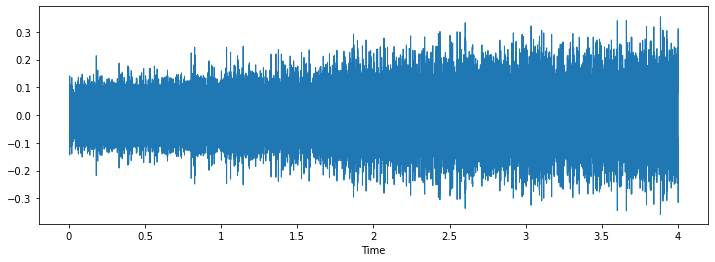

In [4]:
#EDA(Exploratory Data Analysis)
#filename='C:/Users/Sadhvi B S/III sem project/Audio Classification/USCdataset/fold1/7061-6-0-0.wav'
filename='C:/Users/Sadhvi B S/III sem project/Audio Classification/USCdataset/machine.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(filename) # pass only one audio file here not the entire folder
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

# to read all the audio files put the same code block in a for loop. Although, plotting the waveform of all the audio files may not be required 

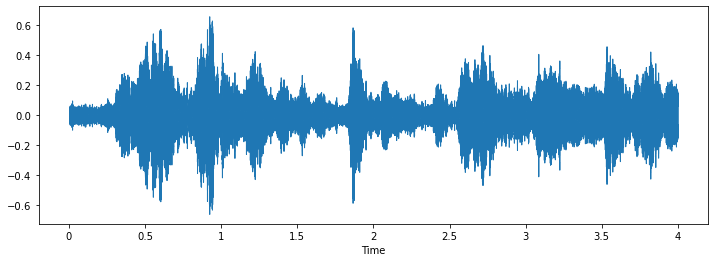

In [5]:
filename='C:/Users/Sadhvi B S/OneDrive/Documents/III sem project/Audio Classification/USCdataset/fold1/97317-2-0-28.wav'
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(filename) # pass only one audio file here not the entire folder
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
data

array([ 0.00641032,  0.00880412,  0.0194822 , ..., -0.11656343,
       -0.08207196,  0.02557773], dtype=float32)

In [8]:
USCdataset=pd.read_csv("C:/Users/Sadhvi B S/III sem project/Audio Classification/USCdataset/UrbanSound8K.csv")
USCdataset.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
#Check whether the dataset is imbalanced
USCdataset['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [10]:
audio_file_path='C:/Users/Sadhvi B S/OneDrive/Documents/III sem project/Audio Classification/USCdataset/100263-2-0-121.wav'
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)

In [11]:
print(librosa_audio_data)

[-0.00270751 -0.00303302 -0.00159557 ... -0.0012889  -0.00184731
 -0.00210062]


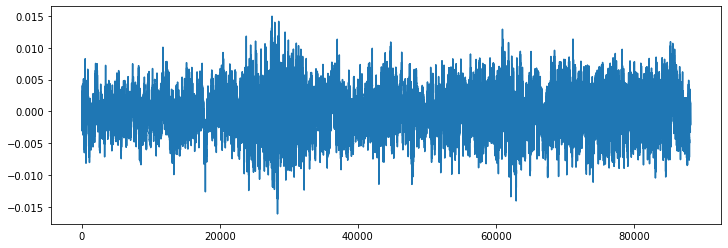

In [12]:
#Lets plot the audio data
import matplotlib.pyplot as plt
#Original audio with one channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [13]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [14]:
wave_audio

array([[ -77, -168],
       [ -58, -159],
       [ -37, -141],
       ...,
       [  -7, -123],
       [   1, -130],
       [   2, -135]], dtype=int16)

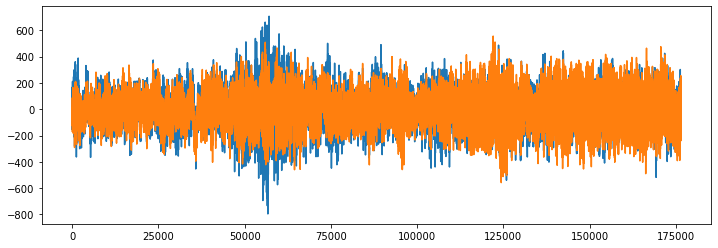

In [15]:
#Original audio with two channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [16]:
#MFCC
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [17]:
mfccs

array([[-4.9322757e+02, -4.6638904e+02, -4.7455182e+02, ...,
        -4.4540848e+02, -4.5237329e+02, -4.6970386e+02],
       [ 1.1033252e+02,  1.1267060e+02,  1.0955853e+02, ...,
         1.1160173e+02,  1.1048808e+02,  1.1151563e+02],
       [-2.0675117e+01, -2.8635067e+01, -3.2546665e+01, ...,
        -3.8440331e+01, -3.4107834e+01, -3.2753922e+01],
       ...,
       [ 2.9066741e-01,  1.6123570e+00,  3.2692361e+00, ...,
         7.8856721e+00,  1.0621336e+01,  9.5419254e+00],
       [-2.3906250e+00, -4.0186548e+00,  4.6177357e-01, ...,
         1.0223863e+01,  1.1982449e+01,  1.3692176e+01],
       [-8.7816315e+00, -8.5461311e+00, -2.1510942e+00, ...,
         2.9695928e+00,  2.2480724e+00,  1.4114031e+00]], dtype=float32)

In [18]:
#Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='C:/Users/Sadhvi B S/OneDrive/Documents/III sem project/Audio Classification/USCdataset'
USCdataset=pd.read_csv('C:/Users/Sadhvi B S/OneDrive/Documents/III sem project/Audio Classification/USCdataset/UrbanSound8K.csv')
USCdataset.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [19]:
#for one audio file
def feature_extractor(file):
    audio, sample_rate=librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features


In [20]:
import numpy as np
from tqdm import tqdm

#Now we iterate through each audio file and extract the featrues using MFCC
#using Mel-frequency cepstral co-efficients
extracted_features=[]
for index_num, row in tqdm(USCdataset .iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])


3555it [02:48, 22.29it/s]C:\Users\Sadhvi B S\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [06:17, 29.80it/s]C:\Users\Sadhvi B S\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Sadhvi B S\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [06:34, 22.12it/s]


In [21]:
#converting extracted features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head(15)

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing
5,"[-447.89523, 118.50543, -35.228786, 56.749832,...",children_playing
6,"[-477.5772, 120.77014, -29.808723, 57.168816, ...",children_playing
7,"[-465.11285, 117.74784, -30.20789, 50.73054, -...",children_playing
8,"[-472.3313, 126.66913, -38.29017, 58.69302, -2...",children_playing
9,"[-197.41542, 114.81325, -14.577484, 1.0749294,...",car_horn


In [22]:
#split the datadet into dependent and independent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [23]:
#label encoding
#y=np.array(pd.get_dummies(y))
#label encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
y.shape

(8732, 10)

In [25]:
X.shape

(8732, 40)

In [26]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)


In [27]:
X_train.shape

(6985, 40)

In [28]:
X_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

In [31]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912868e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008624e+00, -1.5975088e+00],
       [-4.9827816e+01,  1.8449375e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066742e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839476e+00, -1.9667519e+00, -8.8792092e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413876e+00]], dtype=float32)

In [32]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
#Model creation
import tensorflow as tf
print(tf.__version__)

2.5.0


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [35]:
#Number of classes
num_labels=y.shape[1]

In [36]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [38]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [39]:
#training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=64

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time", duration)


Epoch 1/100
110/110 [==============================] - 1s 5ms/step - loss: 15.3669 - accuracy: 0.1231 - val_loss: 2.2644 - val_accuracy: 0.1505

Epoch 00001: val_loss improved from inf to 2.26444, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 3.1968 - accuracy: 0.1300 - val_loss: 2.2871 - val_accuracy: 0.1248

Epoch 00002: val_loss did not improve from 2.26444
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 2.4916 - accuracy: 0.1304 - val_loss: 2.2791 - val_accuracy: 0.1276

Epoch 00003: val_loss did not improve from 2.26444
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 2.3482 - accuracy: 0.1256 - val_loss: 2.2609 - val_accuracy: 0.1391

Epoch 00004: val_loss improved from 2.26444 to 2.26094, saving model to saved_models\audio_classification.hdf5
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 2.2999 - accuracy: 0.1469 - 

In [40]:
test_accuracy=model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])


0.7653119564056396


In [42]:
filename="C:/Users/Sadhvi B S/OneDrive/Documents/III sem project/Audio Classification/USCdataset/fold10/209672-3-6-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
#np.argmax(model.predict(X), axis=-1)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-4.44420288e+02  1.08238556e+02 -3.21448059e+01 -1.74210262e+01
 -5.08103228e+00 -2.96244669e+00 -8.06347561e+00  8.30765533e+00
 -1.02565317e+01  5.68042564e+00  9.43129921e+00  1.05306368e+01
  1.51669540e+01  1.96489601e+01  1.07818060e+01  9.00459862e+00
 -2.82717371e+00  4.13471889e+00 -3.88589668e+00 -2.06873703e+00
 -4.37420607e+00 -4.96596527e+00 -2.61756635e+00  6.20126629e+00
  2.43732071e+00  2.36859083e+00  4.29897213e+00  2.20156622e+00
  4.36211872e+00  1.60912895e+00  1.18499327e+00  2.07881355e+00
  1.57753110e+00  3.29228103e-01 -6.19318366e-01  1.56986725e+00
  1.54118097e+00 -8.28273654e-01 -3.50340343e+00 -2.38915539e+00]
[[-4.44420288e+02  1.08238556e+02 -3.21448059e+01 -1.74210262e+01
  -5.08103228e+00 -2.96244669e+00 -8.06347561e+00  8.30765533e+00
  -1.02565317e+01  5.68042564e+00  9.43129921e+00  1.05306368e+01
   1.51669540e+01  1.96489601e+01  1.07818060e+01  9.00459862e+00
  -2.82717371e+00  4.13471889e+00 -3.88589668e+00 -2.06873703e+00
  -4.37420607e+00 -

array(['dog_bark'], dtype='<U16')